In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clean_motorcycle.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391 entries, 0 to 6390
Data columns (total 15 columns):
Condition         6391 non-null object
Price             6391 non-null int64
Model_Year        6391 non-null int64
Mileage           6391 non-null float64
Exterior_Color    6391 non-null object
Make              6391 non-null object
Warranty          6391 non-null object
Type              6391 non-null object
OBO               6391 non-null bool
Feedback_Perc     6391 non-null int64
N_Reviews         6391 non-null int64
Seller_Status     6391 non-null object
Vehicle_Title     6391 non-null object
Auction           6391 non-null bool
Buy_Now           6391 non-null bool
dtypes: bool(3), float64(1), int64(4), object(7)
memory usage: 618.0+ KB


In [4]:
df.head(5)

,Condition,Price,Model_Year,Mileage,Exterior_Color,Make,Warranty,Type,OBO,Feedback_Perc,N_Reviews,Seller_Status,Vehicle_Title,Auction,Buy_Now
0,Used,11412,2013,16.000,black,Harley-Davidson,Unknown,cruiser,False,8,2427,Owner,Clear,True,False
1,Used,3872,1970,25.763,blue,BMW,No,standard,False,100,136,Company,Clear,True,False
2,Used,6575,2009,33.142,red,Harley-Davidson,Yes,touring,False,100,2920,Dealer,Clear,True,False
3,Used,10000,2012,17.800,blue,Harley-Davidson,No,touring,False,100,271,Owner,Clear,True,True
4,Used,1500,1972,0.000,red,Harley-Davidson,No,Others,False,100,412,Owner,Clear,True,False


In [5]:
df['Auction'] = df['Auction'].map({True : 1,False : 0})
df['Buy_Now'] = df['Buy_Now'].map({True : 1,False : 0})
df['OBO']= df['OBO'].map({True : 1,False : 0})
df['Vehicle_Title'] = df['Vehicle_Title'].map({'Flood, Water Damage': 1, 'Salvage': 2, 'Rebuilt & Reconstructed':3, 'Clear' :4 })

In [6]:
x = pd.get_dummies((df.drop('Price',axis=1)), drop_first = True)
y = df['Price']

In [7]:
x.shape

(6391, 57)

### Modelling with default parameter (RandomForestRegressor,GradientBoostingRegressor,Lasso,Ridge, LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import metrics

In [9]:
def regression(x,y):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=101,test_size=0.2)

    algo = [RandomForestRegressor,GradientBoostingRegressor,Lasso,Ridge, LinearRegression]
    model = []
    scores = []
    for item in algo:
        model.append(item())

    for item in model:
        item.fit(x_train, y_train)
        prediction = item.predict(x_test) 
        mae = mean_absolute_error(y_test,prediction)
        mse = metrics.mean_squared_error(y_test,prediction)
        rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction))
        r2_score = metrics.r2_score(y_test,prediction)
        temp = [mae,mse,rmse,r2_score]
        scores.append(temp)

    df = pd.DataFrame(scores, columns = ['MAE', 'MSE', 'RMSE','r2_score'] , index = ['RandomForestRegressor','GradientBoostingRegressor','Lasso','Ridge', 'LinearRegression'])
    return df

In [10]:
regression(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,MSE,RMSE,r2_score
RandomForestRegressor,2494.821134,1.262009e+07,3552.476193,0.645843
GradientBoostingRegressor,2904.121993,1.514125e+07,3891.175764,0.575091
Lasso,3359.001712,1.926722e+07,4389.443841,0.459304
Ridge,3356.323902,1.922710e+07,4384.871407,0.460430
LinearRegression,3356.325139,1.921622e+07,4383.630711,0.460736


In [11]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=101,test_size=0.2)

In [12]:
from statsmodels.api import OLS

In [13]:
model = OLS(y_train,x_train)

In [14]:
result = model.fit()

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.818
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              399.0
Date:                Wed, 05 Feb 2020   Prob (F-statistic):                        0.00
Time:                        18:54:00   Log-Likelihood:                         -50348.
No. Observations:                5112   AIC:                                  1.008e+05
Df Residuals:                    5055   BIC:                                  1.012e+05
Df Model:                          57                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Model_Year                  3.4193      0.766      4.465      0.000       1.918       4.920
Mileage                   -57.4277      5.604    -10.248      0.000     -68.413     -46.442
OBO                      -426.4148    194.514     -2.192      0.028    -807.746     -45.084
Feedback_Perc               7.5604      1.774      4.262      0.000       4.083      11.038
N_Reviews                  -0.0049      0.002     -2.411      0.016      -0.009      -0.001
Vehicle_Title            1335.7810    202.565      6.594      0.000     938.667    1732.895
Auction                 -4862.8271    242.474    -20.055      0.000   -5338.180   -4387.474
Buy_Now                 -1031.6342    179.045     -5.762      0.000   -1382.640    -680.628
Condition_Used          -2791.5118    247.641    -11.272      0.000   -3276.996   -2306.027
Exterior_Color_black      799.7658    206.960      3.864      0.000     394.035    1205.496
Exterior_Color_blue       225.4912    262.787      0.858      0.391    -289.686     740.668
Exterior_Color_burgundy   640.5543    486.880      1.316      0.188    -313.942    1595.051
Exterior_Color_custom    1005.3828    928.418      1.083      0.279    -814.719    2825.484
Exterior_Color_gold       890.2153    711.565      1.251      0.211    -504.760    2285.191
Exterior_Color_gray       491.5747    414.529      1.186      0.236    -321.083    1304.232
Exterior_Color_green      -36.8059    428.645     -0.086      0.932    -877.135     803.523
Exterior_Color_orange    1030.3036    417.080      2.470      0.014     212.646    1847.961
Exterior_Color_purple    -395.0197    734.927     -0.537      0.591   -1835.795    1045.755
Exterior_Color_red        640.4015    243.769      2.627      0.009     162.508    1118.295
Exterior_Color_silver      22.6307    343.321      0.066      0.947    -650.427     695.689
Exterior_Color_white      970.8615    324.953      2.988      0.003     333.813    1607.910
Exterior_Color_yellow    -686.2787    511.670     -1.341      0.180   -1689.374     316.817
Make_Aprilia            -3335.4265   1543.699     -2.161      0.031   -6361.745    -309.108
Make_BMW                 -452.0618   1196.512     -0.378      0.706   -2797.745    1893.621
Make_Buell              -5545.3162   1529.531     -3.626      0.000   -8543.860   -2546.772
Make_Ducati             -1087.8666   1223.062     -0.889      0.374   -3485.598    1309.865
Make_Harley-Davidson      786.4486   1168.802      0.673      0.501   -1504.910    3077.807
Make_Honda              -4038.0294   1175.780     -3.434      0.001   -6343.068   -1732.991
Make_Kawasaki           -5185.7342   1193.089     -4.346      0.000   -7524.705   -2846.764
Make_Moto Guzzi         -2855.0876   149

### Modelling with cross validation

In [16]:
from sklearn.model_selection import KFold

In [17]:
for i in range(2,7):
    cv_scores = cross_val_score(RandomForestRegressor(),x,y,cv=i)
    print ('cv = ' + str(i) + ' , mean = ' + str(cv_scores.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


cv = 2 , mean = 0.2990053388182474


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


cv = 3 , mean = 0.34470096153807744


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


cv = 4 , mean = 0.37444671067932067


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

cv = 5 , mean = 0.38617981424607056


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

cv = 6 , mean = 0.38178775450832964


In [18]:
def regression_model(n_cv):
    score = []
    model_name = ['Linear Regression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor']
    models = [LinearRegression,Lasso,Ridge,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor]
    for item in models:
        rmse = []
        mae = []
        kf = KFold(n_splits=n_cv,shuffle=True)
        for train_index , test_index in kf.split(x,y):
            X_train,X_test,y_train,y_test = x.iloc[train_index],x.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
            model = item()
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            mae.append(round(mean_absolute_error(y_test,prediction),2))
            rmse.append(round(np.sqrt(mean_squared_error(y_test,prediction)),2))

        temp = [
            sum(mae)/n_cv,
            sum(rmse)/n_cv
        ]
        score.append(temp)
    return pd.DataFrame(score,columns=['MAE','RMSE'],index=model_name)

In [19]:
regression_model(4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,RMSE
Linear Regression,3467.2650,4541.1975
Lasso,3466.8725,4537.9875
Ridge,3463.7225,4536.5775
DecisionTreeRegressor,2935.2900,4759.4125
RandomForestRegressor,2613.2825,3814.1575
GradientBoostingRegressor,3007.3250,4074.1325


### Modelling with standar scaler

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [21]:
x.head(10)

,Model_Year,Mileage,OBO,Feedback_Perc,N_Reviews,Vehicle_Title,Auction,Buy_Now,Condition_Used,Exterior_Color_black,...,Type_gasoline,Type_naked,Type_scooter,Type_softail,Type_sport,Type_standard,Type_super,Type_touring,Seller_Status_Dealer,Seller_Status_Owner
0,2013,16.000,0,8,2427,4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,1970,25.763,0,100,136,4,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2009,33.142,0,100,2920,4,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,2012,17.800,0,100,271,4,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
4,1972,0.000,0,100,412,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,2010,5.548,0,10,6229,4,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
6,1975,17.868,0,10,1159,4,1,0,1,1,...,0,0,0,0,1,0,0,0,0,1
7,2014,2.800,0,0,3,4,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
8,2015,3.000,0,0,1,4,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
9,1978,30.000,0,10,1159,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
scaler = StandardScaler()
x_num = scaler.fit(x)
x_num_scaled = x_num.transform(x)
x_scaled = pd.DataFrame(x_num_scaled, columns = x.columns)

In [23]:
x_scaled.head(10)

,Model_Year,Mileage,OBO,Feedback_Perc,N_Reviews,Vehicle_Title,Auction,Buy_Now,Condition_Used,Exterior_Color_black,...,Type_gasoline,Type_naked,Type_scooter,Type_softail,Type_sport,Type_standard,Type_super,Type_touring,Seller_Status_Dealer,Seller_Status_Owner
0,0.535261,0.238839,-1.038122,-1.938464,-0.077804,0.186968,1.505228,-1.051554,0.380427,1.431990,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,-0.433241,-1.010223,1.197389
1,-3.034958,1.006566,-1.038122,0.509448,-0.143684,0.186968,1.505228,-1.051554,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,2.748737,-0.039587,-0.433241,-1.010223,-0.835151
2,0.203147,1.586823,-1.038122,0.509448,-0.063627,0.186968,1.505228,-1.051554,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,2.308186,0.989881,-0.835151
3,0.452232,0.380384,-1.038122,0.509448,-0.139802,0.186968,1.505228,0.950973,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,2.308186,-1.010223,1.197389
4,-2.868901,-1.019343,-1.038122,0.509448,-0.135748,0.186968,1.505228,-1.051554,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,-0.433241,-1.010223,1.197389
5,0.286176,-0.583069,-1.038122,-1.885248,0.031527,0.186968,1.505228,-1.051554,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,2.308186,0.989881,-0.835151
6,-2.619816,0.385731,-1.038122,-1.885248,-0.114267,0.186968,1.505228,-1.051554,0.380427,1.431990,...,-0.528416,-0.108233,-0.057417,-0.043372,3.529127,-0.363803,-0.039587,-0.433241,-1.010223,1.197389
7,0.618289,-0.799161,-1.038122,-2.151325,-0.147509,0.186968,1.505228,0.950973,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,2.308186,-1.010223,1.197389
8,0.701317,-0.783434,-1.038122,-2.151325,-0.147566,0.186968,1.505228,-1.051554,0.380427,1.431990,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,-0.433241,-1.010223,1.197389
9,-2.370731,1.339748,-1.038122,-1.885248,-0.114267,0.186968,1.505228,-1.051554,0.380427,-0.698329,...,-0.528416,-0.108233,-0.057417,-0.043372,-0.283356,-0.363803,-0.039587,-0.433241,-1.010223,1.197389


In [24]:
regression(x_scaled,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,MSE,RMSE,r2_score
RandomForestRegressor,2483.583319,1.263528e+07,3554.614230,0.645416
GradientBoostingRegressor,2903.991289,1.514207e+07,3891.280814,0.575068
Lasso,3355.765102,1.921695e+07,4383.713952,0.460715
Ridge,3356.189232,1.921609e+07,4383.616263,0.460739
LinearRegression,3356.325139,1.921622e+07,4383.630711,0.460736


### Modelling use Standar Scaler and PCA

In [25]:
from sklearn.decomposition import PCA

In [26]:
scores = []
for item in range(1,25):
    pca = PCA(n_components=item)
    x_pca = pca.fit_transform(x_scaled)
    x_pca_df = pd.DataFrame(x_pca,columns=['PC ' + str(i) for i in range(1,item+1)])
    cv_score = cross_val_score(RandomForestRegressor(),x_pca_df,y,cv=5)
    scores.append(cv_score.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [27]:
data_pca_score = pd.DataFrame(scores)

In [28]:
data_pca_score

,0
0,-0.436236
1,-0.065409
2,0.072450
3,0.142685
4,0.158929
5,0.181566
6,0.258965
7,0.246685
8,0.217114
9,0.251103


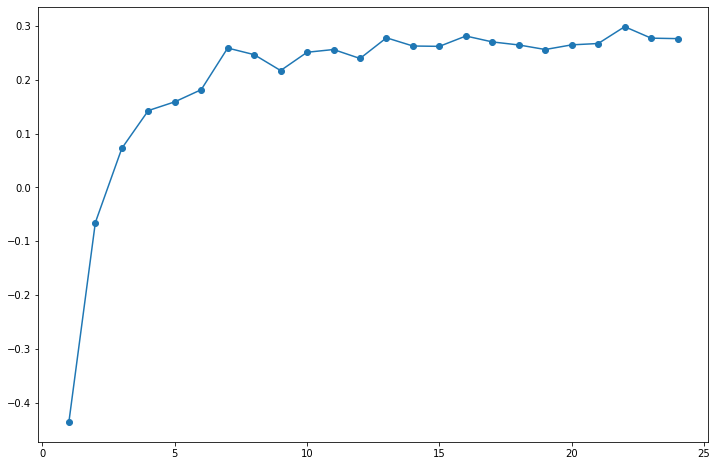

In [29]:
plt.figure(figsize=(12,8))
plt.plot(range(1,25),data_pca_score[0],marker='o')

In [30]:
pca.explained_variance_ratio_

array([0.06572894, 0.04105866, 0.03554986, 0.03284702, 0.02726513,
       0.02570723, 0.02516352, 0.02509672, 0.0244234 , 0.02351373,
       0.0227072 , 0.02193499, 0.02125996, 0.02014284, 0.01994447,
       0.01969301, 0.0192694 , 0.01876904, 0.0184383 , 0.01835957,
       0.01818889, 0.01801746, 0.01776682, 0.01763225])

In [31]:
scores = []
pca = PCA(n_components=18)
pca_transformer = pca.fit(x_scaled)
x_pca18 = pca_transformer.transform(x_scaled)
X_train, X_test, y_train, y_test = train_test_split(x_pca18,y,random_state = 101)
rfc_model_pca18 = RandomForestRegressor().fit(X_train, y_train)
prediction = rfc_model_pca18.predict(X_test)
mae = metrics.mean_absolute_error(y_test,prediction)
mse = metrics.mean_squared_error(y_test,prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction))
r2_score = metrics.r2_score(y_test,prediction)
temp = [mae,mse,rmse,r2_score]
scores.append(temp)
pd.DataFrame(scores, columns = ['MAE', 'MSE', 'RMSE','r2_score'] , index = ['RandomForestRegressor'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,MSE,RMSE,r2_score
RandomForestRegressor,2980.80331,1.671963e+07,4088.964697,0.543484


In [32]:
def regression_pca(x,y):
    
    pca = PCA(n_components=18)
    pca_transformer = pca.fit(x_scaled)
    x_pca18 = pca_transformer.transform(x_scaled)
    X_train, X_test, y_train, y_test = train_test_split(x_pca18,y,random_state = 101)

    algo = [RandomForestRegressor,GradientBoostingRegressor,Lasso,Ridge, LinearRegression]
    model = []
    scores = []
    for item in algo:
        model.append(item())

    for item in model:
        item.fit(X_train, y_train)
        prediction = item.predict(X_test) 
        mae = metrics.mean_absolute_error(y_test,prediction)
        mse = metrics.mean_squared_error(y_test,prediction)
        rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction))
        r2_score = metrics.r2_score(y_test,prediction)
        temp = [mae,mse,rmse,r2_score]
        scores.append(temp)

    df = pd.DataFrame(scores, columns = ['MAE', 'MSE', 'RMSE','r2_score'] , index = ['RandomForestRegressor','GradientBoostingRegressor','Lasso','Ridge', 'LinearRegression'])
    return df

In [33]:
regression_pca(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,MSE,RMSE,r2_score
RandomForestRegressor,2964.497814,1.701086e+07,4124.421781,0.535533
GradientBoostingRegressor,3313.434380,1.903417e+07,4362.817153,0.480288
Lasso,3691.355496,2.313426e+07,4809.808817,0.368338
Ridge,3691.367158,2.313505e+07,4809.890861,0.368317
LinearRegression,3691.365617,2.313513e+07,4809.899554,0.368315


### Modelling with Hyperparameter

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameter = {"max_depth": [3,5,7],
             "max_features": [1, 3, 10],
             "min_samples_split": [3, 5, 10],
             "min_samples_leaf" : [5,10,15]}
grid = GridSearchCV(RandomForestRegressor(n_estimators=100,random_state=101),parameter,cv=4)
grid.fit(x,y)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=101,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7], 'max_featur

In [36]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [37]:
grid.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [38]:
rf_mhp = RandomForestRegressor(n_estimators=100,random_state=101,max_depth=7,max_features=10,min_samples_leaf=5, min_samples_split=3)
rf_mhp.fit(X_train,y_train)
prediction = rf_mhp.predict(X_test)
print('MAE dari model dengan hyperparameter {}'.format(metrics.mean_absolute_error(y_test,prediction)))

MAE dari model dengan hyperparameter 3199.6215891211928


###  Modelling with Hyperparameter use Standar_scaler

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=101)
rf_mhp_std = RandomForestRegressor(n_estimators=100,random_state=101,max_depth=7,max_features=10,min_samples_leaf=5, min_samples_split=3)
rf_mhp_std.fit(X_train,y_train)
prediction = rf_mhp_std.predict(X_test)
print('MAE dari model dengan hyperparameter standar scaler {}'.format(metrics.mean_absolute_error(y_test,prediction)))

MAE dari model dengan hyperparameter standar scaler 3199.692132538337


### Modelling with reduce in the feature and reduce in the rows

In [40]:
df.drop(df[df['Price'] < 500].index, inplace = True)
df.drop(df[df['Price'] > 25000].index, inplace = True)
df.drop(df[(df['Condition'] == 'New') & (df['Mileage'] > 3)].index, inplace = True)
df.drop(df[(df['Condition'] == 'Used') & (df['Mileage'] == 0)].index, inplace = True)
df.drop(df[df['Mileage'] > 35].index, inplace =True)
df.drop(df[df['N_Reviews'] >3000].index, inplace = True)
df.drop(df[df['Model_Year'] < 1970].index, inplace = True)

In [41]:
df = df.reset_index(drop=True)

In [42]:
x_cut = pd.get_dummies((df.drop('Price',axis=1)), drop_first = True)
y_cut = df['Price']
regression(x_cut,y_cut)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,MSE,RMSE,r2_score
RandomForestRegressor,2455.186497,1.213588e+07,3483.658474,0.630608
GradientBoostingRegressor,2810.657986,1.374381e+07,3707.263986,0.581665
Lasso,3296.978401,1.757344e+07,4192.068356,0.465099
Ridge,3297.308036,1.756153e+07,4190.647632,0.465462
LinearRegression,3302.452351,1.763687e+07,4199.626899,0.463168


In [43]:
scaler = StandardScaler()
x_num_cut = scaler.fit(x_cut)
x_num_scaled_cut = x_num_cut.transform(x_cut)
x_scaled_cut = pd.DataFrame(x_num_scaled_cut, columns = x_cut.columns)

In [44]:
x_scaled_cut.head(10)

,Model_Year,Mileage,OBO,Feedback_Perc,N_Reviews,Vehicle_Title,Auction,Buy_Now,Condition_Used,Exterior_Color_black,...,Type_gasoline,Type_naked,Type_scooter,Type_softail,Type_sport,Type_standard,Type_super,Type_touring,Seller_Status_Dealer,Seller_Status_Owner
0,0.538378,0.595159,-1.051113,-2.147603,3.240174,0.133289,1.532453,-1.060938,0.343731,1.412931,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,-0.424444,-0.956771,1.137880
1,-3.853943,1.673973,-1.051113,0.462293,-0.533574,0.133289,1.532453,-1.060938,0.343731,-0.707749,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,2.863629,-0.04264,-0.424444,-0.956771,-0.878827
2,0.129790,2.489353,-1.051113,0.462293,4.052246,0.133289,1.532453,-1.060938,0.343731,-0.707749,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,2.356026,1.045182,-0.878827
3,0.436231,0.794060,-1.051113,0.462293,-0.311201,0.133289,1.532453,0.942562,0.343731,-0.707749,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,2.356026,-0.956771,1.137880
4,-3.343208,0.801574,-1.051113,-2.090866,1.151517,0.133289,1.532453,-1.060938,0.343731,1.412931,...,-0.535458,-0.110668,-0.04715,-0.04715,3.291705,-0.349207,-0.04264,-0.424444,-0.956771,1.137880
5,0.640525,-0.863443,-1.051113,-2.374550,-0.752652,0.133289,1.532453,0.942562,0.343731,-0.707749,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,2.356026,-0.956771,1.137880
6,0.742672,-0.841343,-1.051113,-2.374550,-0.755947,0.133289,1.532453,-1.060938,0.343731,1.412931,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,-0.424444,-0.956771,1.137880
7,-3.036767,2.142162,-1.051113,-2.090866,1.151517,0.133289,1.532453,-1.060938,0.343731,-0.707749,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,-0.424444,-0.956771,1.137880
8,0.334084,-0.531942,-1.051113,0.462293,-0.620876,0.133289,1.532453,-1.060938,0.343731,1.412931,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,2.356026,-0.956771,1.137880
9,0.027643,1.269432,-1.051113,-2.119234,-0.355676,0.133289,1.532453,-1.060938,0.343731,-0.707749,...,-0.535458,-0.110668,-0.04715,-0.04715,-0.303794,-0.349207,-0.04264,2.356026,-0.956771,1.137880


In [45]:
regression(x_scaled_cut,y_cut)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,MAE,MSE,RMSE,r2_score
RandomForestRegressor,2468.880908,1.213721e+07,3483.849405,0.630567
GradientBoostingRegressor,2814.700742,1.375279e+07,3708.476049,0.581392
Lasso,3300.339744,1.761612e+07,4197.155933,0.463800
Ridge,3302.069866,1.763319e+07,4199.189090,0.463280
LinearRegression,3302.452351,1.763687e+07,4199.626899,0.463168


### Model to export

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


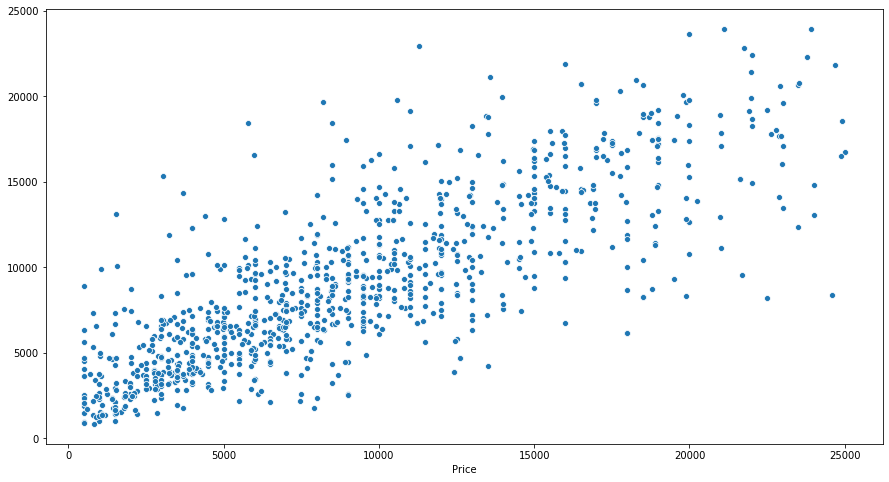

In [46]:
X_train,X_test, y_train,y_test = train_test_split(x_scaled_cut,y_cut, random_state = 101, test_size = 0.2)
model_rfc = RandomForestRegressor()
model_rfc.fit(X_train,y_train)
prediction = model_rfc.predict(X_test)
plt.figure(figsize=(15,8))
sns.scatterplot(y_test,prediction)

In [47]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])
df_prediction.sort_values(by='Selisih',ascending=False)

,y_true,y_pred,Selisih
4222,24595,8371.900000,16223.100000
1535,22500,8192.600000,14307.400000
4139,5799,18411.900000,12612.900000
164,3050,15325.000000,12275.000000
1059,21699,9559.000000,12140.000000
2780,18000,6170.000000,11830.000000
2782,18000,6170.000000,11830.000000
4945,11299,22919.000000,11620.000000
1190,1550,13134.600000,11584.600000
231,19875,8325.000000,11550.000000


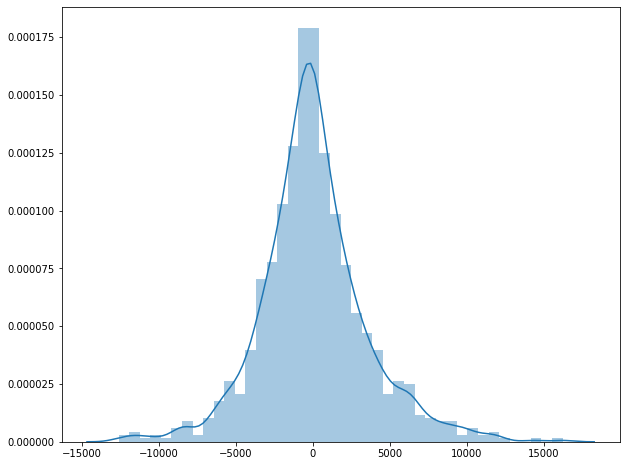

In [48]:
plt.figure(figsize=(10,8))
sns.distplot(df_prediction['y_true'] - df_prediction['y_pred'])

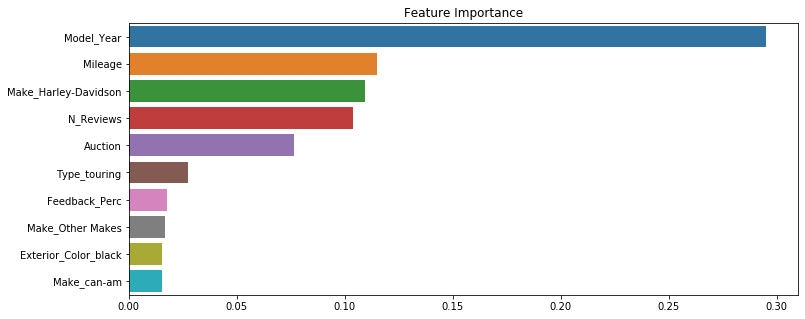

In [49]:
feat_importance = pd.Series(model_rfc.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
plt.title('Feature Importance')
sns.barplot(x=feat_importance.values,y=feat_importance.index)

In [50]:
# import pickle
# filename = 'fix_model.sav'
# pickle.dump(model_rfc, open(filename, 'wb'))

In [51]:
# filename = 'x_dummies_colomn.sav'
# pickle.dump(x_scaled_cut, open(filename , 'wb'))

In [52]:
# filename = 'real_colomn.sav'
# pickle.dump(df.drop(['Price'],axis=1).columns, open(filename , 'wb'))